<a href="https://colab.research.google.com/github/ishita966/2018_snu_hackathon_BitsNBytes/blob/master/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
#import warnings

In [0]:
train=pd.read_csv("Train.csv")
print(train)

          ID          Datetime  Count  Region  Feature1  Feature2  Feature3  \
0          0  25-08-2012 00:00      8       3         0         0         0   
1          1  25-08-2012 01:00      2       8         1         0         0   
2          2  25-08-2012 02:00      6       6         0         1         0   
3          3  25-08-2012 03:00      2       9         0         0         0   
4          4  25-08-2012 04:00      2      10         0         0         1   
5          5  25-08-2012 05:00      2      10         0         0         1   
6          6  25-08-2012 06:00      2       9         1         0         1   
7          7  25-08-2012 07:00      2       8         0         1         0   
8          8  25-08-2012 08:00      6       6         1         1         0   
9          9  25-08-2012 09:00      2       1         1         1         1   
10        10  25-08-2012 10:00      2       3         1         0         0   
11        11  25-08-2012 11:00      6       4       

In [0]:
test = pd.read_csv("Test.csv")

FileNotFoundError: ignored

In [0]:
train_original=train.copy()
test_original=test.copy()

NameError: ignored

In [0]:
train.columns

Index(['ID', 'Datetime', 'Count', 'Region', 'Feature1', 'Feature2', 'Feature3',
       'Feature4', 'Feature5'],
      dtype='object')

In [0]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [0]:
train.shape

(18288, 9)

In [0]:
test.shape

(5112, 2)

In [0]:
train.dtypes

ID           int64
Datetime    object
Count        int64
Region       int64
Feature1     int64
Feature2     int64
Feature3     int64
Feature4     int64
Feature5     int64
dtype: object

In [0]:
test.dtypes

NameError: ignored

In [0]:
train['Datetime']=pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')

In [0]:
train['Datetime']

In [0]:
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [0]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [0]:
train['year']

In [0]:
train['month']

In [0]:
train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2


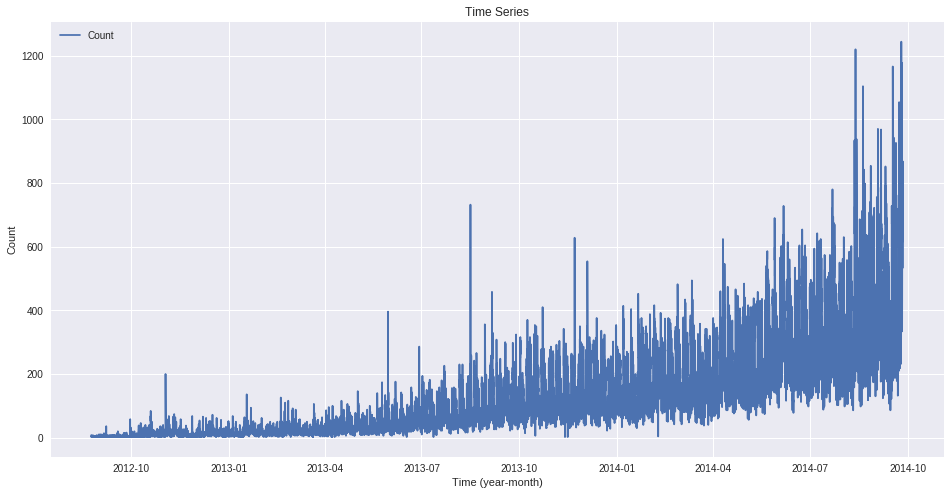

In [0]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Count")
plt.legend(loc = 'best')

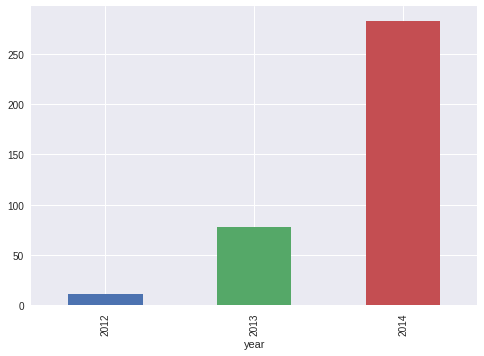

In [0]:
train.groupby('year')['Count'].mean().plot.bar()

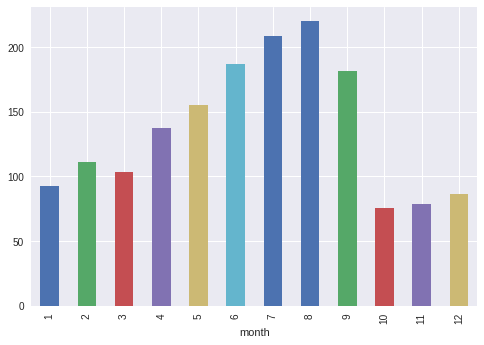

In [0]:
train.groupby('month')['Count'].mean().plot.bar()


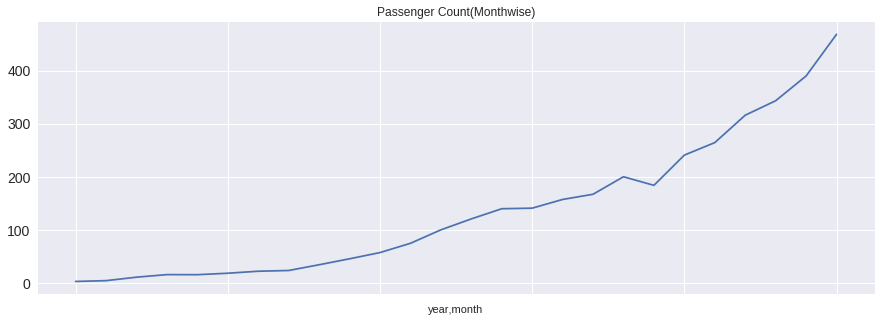

In [0]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)

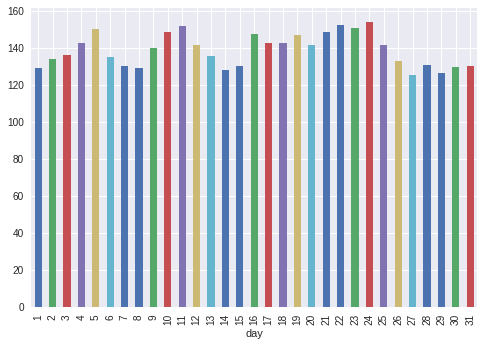

In [0]:
train.groupby('day') ['Count'].mean().plot.bar()


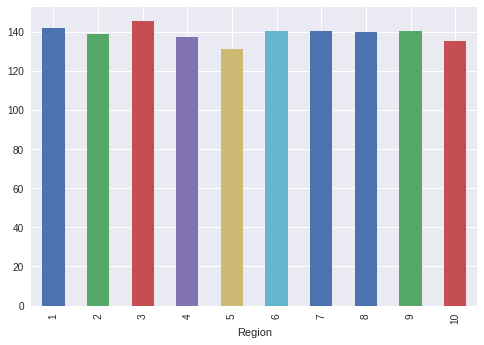

In [0]:
train.groupby('Region') ['Count'].mean().plot.bar()

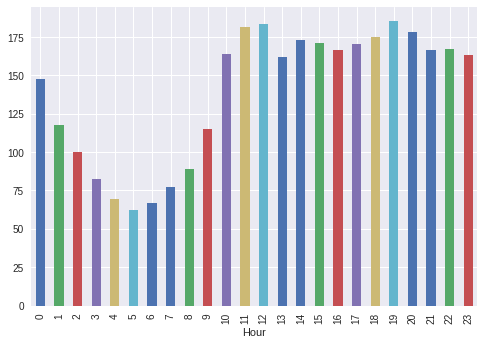

In [0]:
train.groupby('Hour')['Count'].mean().plot.bar()

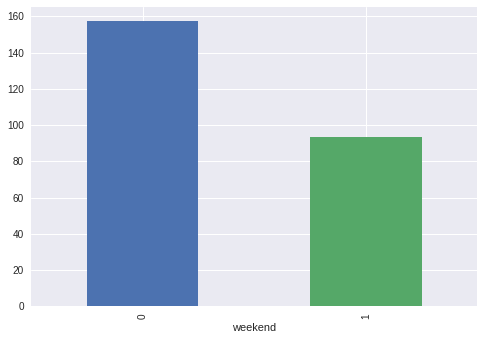

In [0]:
train.groupby('weekend') ['Count'].mean().plot.bar()

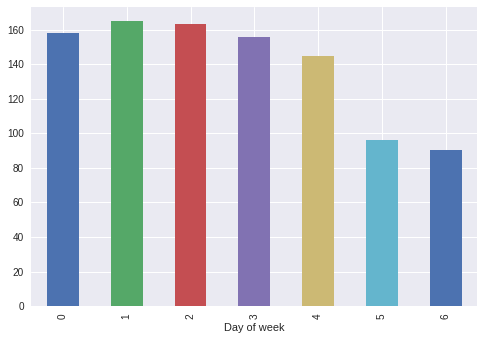

In [0]:
train.groupby('Day of week') ['Count'].mean().plot.bar()

In [0]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


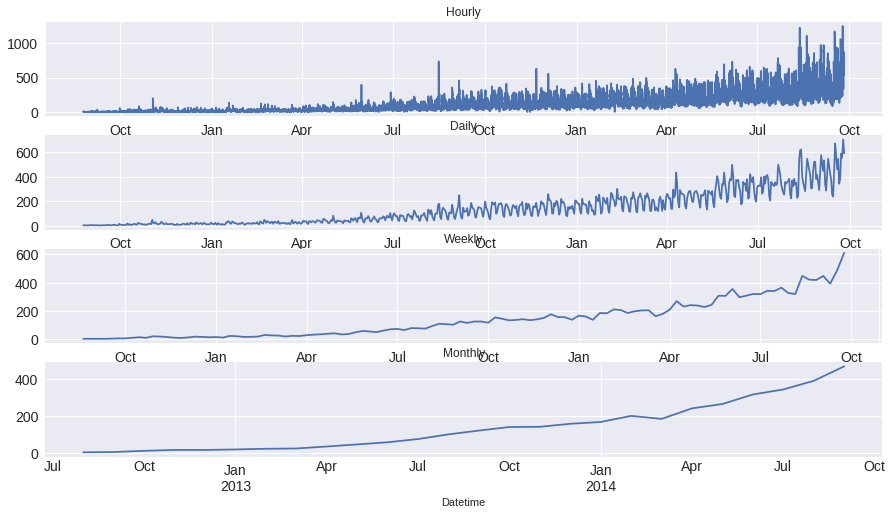

In [0]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


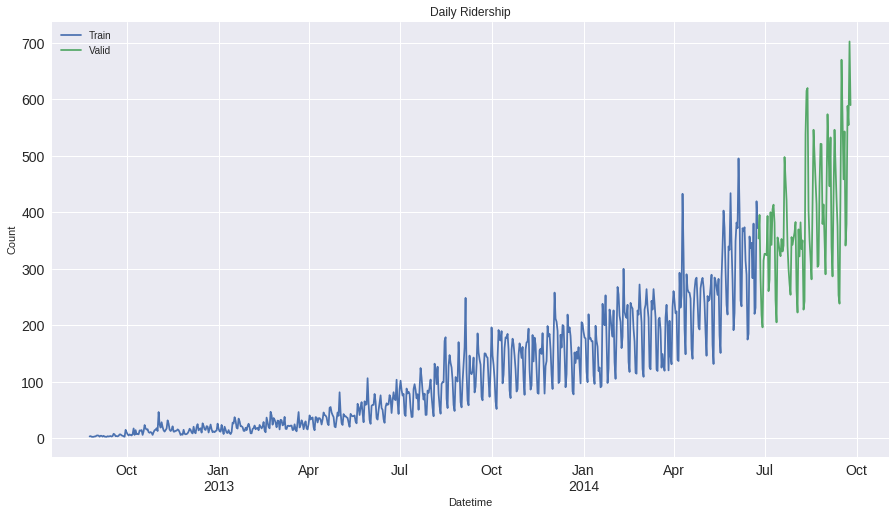

In [0]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.legend(loc = 'best')

Text(0.5,1,'Naive Forecast')

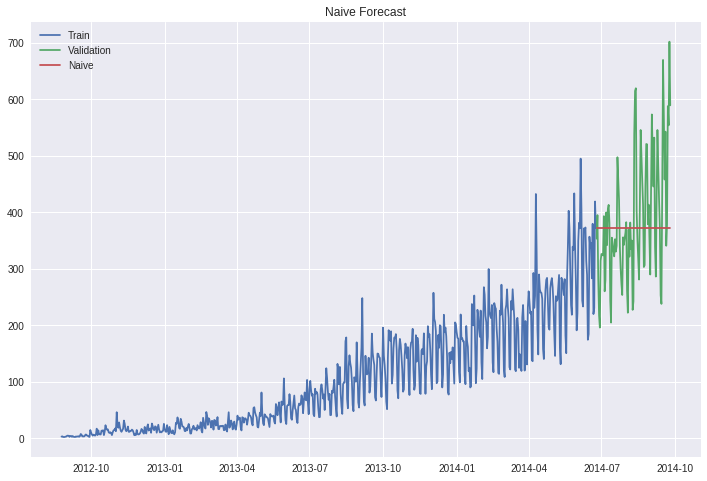

In [0]:
dd = np.asarray(Train.Count)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'],label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rmse

111.79050467496724

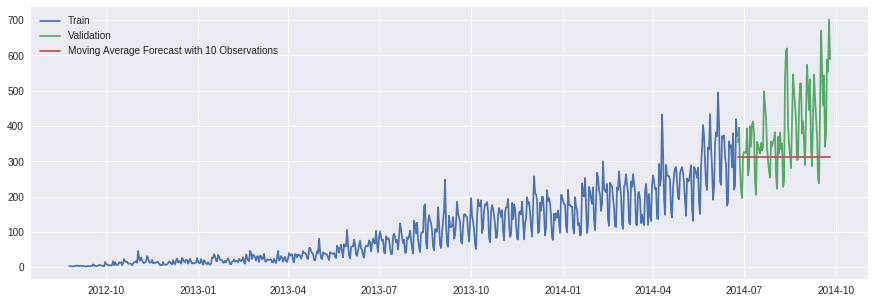

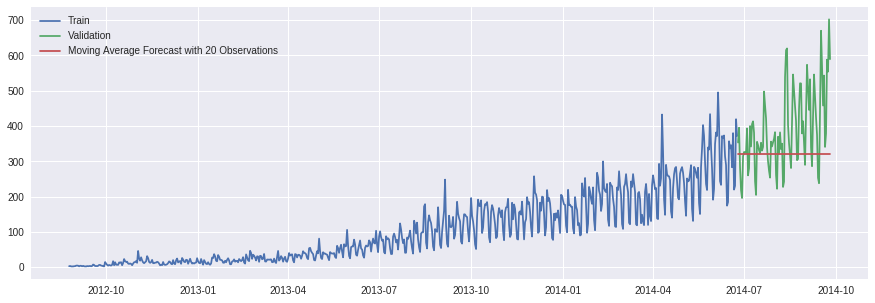

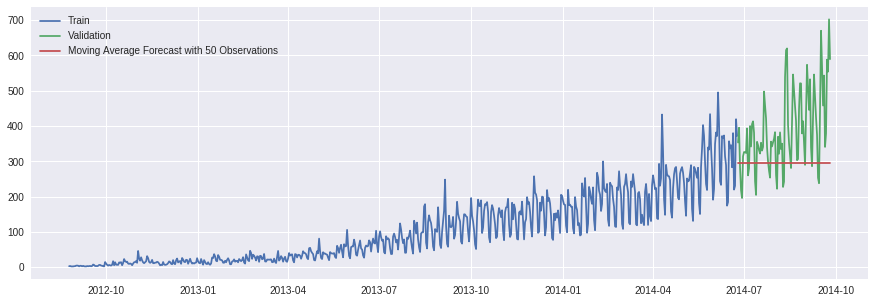

In [0]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()


In [0]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse

144.19175679986802

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ImportError: ignored